In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

# Создаем папку для графиков, если её нет
os.makedirs("figures", exist_ok=True)

# Загрузка и первичный анализ (EDA)


In [2]:
# Загрузка данных
df = pd.read_csv("S05-hw-dataset.csv")

# Просмотр первых строк
print("Первые 5 строк датасета:")
display(df.head())

# Общая информация
print("\nИнформация о столбцах:")
df.info()

# Описательная статистика
print("\nСтатистика числовых признаков:")
display(df.describe())

# Распределение таргета
target_counts = df['default'].value_counts(normalize=True)
print("\nРаспределение целевой переменной (default):")
print(target_counts)

Первые 5 строк датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1



Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_ris

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000



Распределение целевой переменной (default):
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


# Подготовка данных

In [3]:
# Удаляем технический ID и выделяем признаки
X = df.drop(columns=['client_id', 'default'])
y = df['default']

# Разбиение на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Важно для сохранения баланса классов
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2400, 15)
Размер тестовой выборки: (600, 15)


# Baseline (Dummy Classifier)

In [4]:
# Создаем бейзлайн (всегда предсказывает самый частый класс)
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy_acc = accuracy_score(y_test, dummy.predict(X_test))
dummy_roc = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])

print(f"Baseline Accuracy: {dummy_acc:.4f}")
print(f"Baseline ROC-AUC: {dummy_roc:.4f}")

Baseline Accuracy: 0.5900
Baseline ROC-AUC: 0.5000


# Обучение логистической регрессии и подбор гиперпараметров

In [5]:
# Создаем Pipeline: масштабирование + модель
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Сетка параметров для поиска (регуляризация C)
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}

# Поиск лучшего параметра
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Лучший параметр C: {grid.best_params_['logreg__C']}")

# Предсказания
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Метрики
model_acc = accuracy_score(y_test, y_pred)
model_roc = roc_auc_score(y_test, y_proba)

print(f"Model Accuracy: {model_acc:.4f}")
print(f"Model ROC-AUC: {model_roc:.4f}")

Лучший параметр C: 100.0
Model Accuracy: 0.8017
Model ROC-AUC: 0.8756


# Визуализация (ROC-кривая)

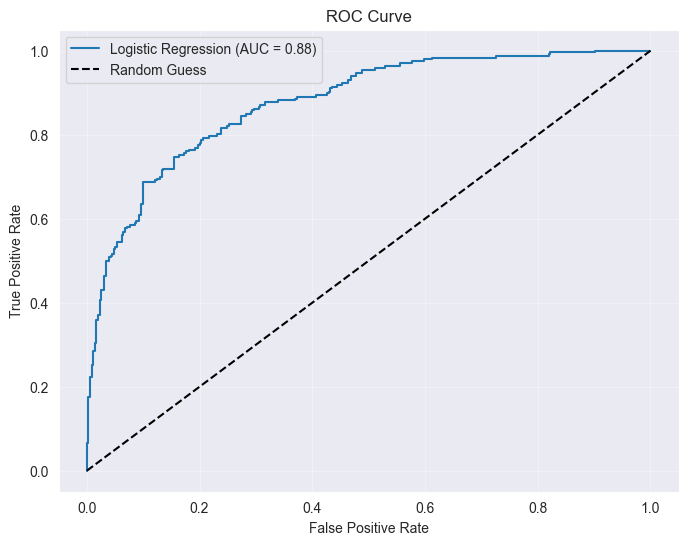

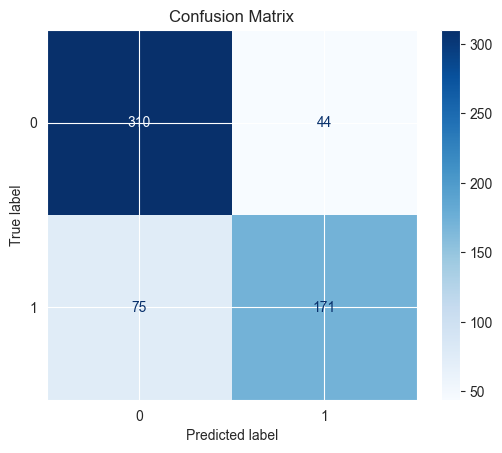

In [6]:
# Строим ROC-кривую
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {model_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)

# Сохранение графика
plt.savefig("figures/roc_curve.png")
plt.show()

# Дополнительно: Матрица ошибок
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("figures/confusion_matrix.png")
plt.show()

# Итоговая таблица и выводы

In [8]:
results = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC-AUC'],
    'Dummy Baseline': [dummy_acc, dummy_roc],
    'Logistic Regression': [model_acc, model_roc]
})

display(results)

,Metric,Dummy Baseline,Logistic Regression
0,Accuracy,0.59,0.801667
1,ROC-AUC,0.50,0.875649


# Выводы:

#### 1. Сравнение моделей
*   **Бейзлайн (DummyClassifier):** Ожидаемо показал точность **0.59**, что соответствует доле самого частого класса в данных. При этом метрика **ROC-AUC равна 0.50**, что подтверждает отсутствие предсказательной силы у случайного классификатора.
*   **Логистическая регрессия:** Модель значительно превзошла бейзлайн. Точность выросла до **0.80**, а **ROC-AUC составил 0.88**. Это высокий показатель, означающий, что в 88% случаев модель верно ранжирует случайную пару.

#### 2. Анализ матрицы ошибок (Confusion Matrix)
На тестовой выборке из 600 объектов модель показала следующие результаты:
*   **310** истинно отрицательных и **171** истинно положительный ответ.
*   **44** ошибки типа "Ложная тревога" (False Positive) - банк отказал бы хорошим клиентам.
*   **75** пропусков целевого события (False Negative) - самые опасные ошибки, когда кредит выдается будущему дефолтнику. Для улучшения бизнес-показателей в будущем можно поработать над снижением этого числа путем изменения порога вероятности.

#### 3. Гиперпараметры и регуляризация
*   В результате поиска по сетке лучшим значением параметра регуляризации стало **C = 100.0**.
*   Высокое значение `C` (слабая регуляризация) говорит о том, что признаки в датасете достаточно информативны, и модели не требовалось сильное "сглаживание" коэффициентов для борьбы с переобучением.

#### 4. Итог
Построенная логистическая регрессия является эффективным инструментом для решения задачи кредитного скоринга на данном датасете. Модель стабильна, интерпретируема и показывает качество предсказания существенно выше случайного, что делает её пригодной для использования.